In [38]:
# Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
import pickle
import pathlib
data_dir = pathlib.Path('/home/snekha/datasets/100.csv')

In [39]:
df = pd.read_csv(data_dir)

In [40]:
df.head()

,first_name,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
0,Angie,2,1,2,0,2,0,0,2,1,0,1,2,1
1,Hilarius,0,2,0,2,0,2,0,2,1,0,1,2,0
2,Stefan,0,2,2,1,2,2,0,2,1,2,0,2,1
3,Tedman,1,0,2,2,0,2,0,1,1,2,1,0,0
4,Pru,0,0,0,2,1,2,1,1,0,0,0,2,0


In [41]:
df.drop(['first_name'], 
        axis = 1, inplace = True)

In [42]:
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
0,2,1,2,0,2,0,0,2,1,0,1,2,1
1,0,2,0,2,0,2,0,2,1,0,1,2,0
2,0,2,2,1,2,2,0,2,1,2,0,2,1
3,1,0,2,2,0,2,0,1,1,2,1,0,0
4,0,0,0,2,1,2,1,1,0,0,0,2,0


In [43]:
# df.drop('Result', axis=1, inplace=True)

In [44]:
# df['Average'] = df.mean(numeric_only=True, axis=1)

In [45]:
# df['Result'] = np.where(df['Average']> 4, 1, 0)

In [46]:
# df['Result'] = df['Result'].replace(['Y'],'1')
# df['Result'] = df['Result'].replace(['N'],'0')

In [47]:
# for i  in df.columns:
#     df[i] = df[i].astype(int)

In [48]:
df

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
0,2,1,2,0,2,0,0,2,1,0,1,2,1
1,0,2,0,2,0,2,0,2,1,0,1,2,0
2,0,2,2,1,2,2,0,2,1,2,0,2,1
3,1,0,2,2,0,2,0,1,1,2,1,0,0
4,0,0,0,2,1,2,1,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,1,2,2,0,1,1,2,1,0,1,2,0
95,1,0,2,2,2,0,1,0,1,0,2,2,0
96,1,1,1,2,2,2,0,1,1,2,2,0,0
97,1,2,2,1,1,1,0,0,0,1,0,0,0


In [49]:
for i  in df.columns:
     df[i] = df[i].astype(int)

In [50]:
df.describe()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,Result
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.000000,0.979798,0.989899,1.040404,1.060606,0.909091,1.010101,1.050505,1.040404,1.090909,0.868687,1.121212,0.454545
std,0.795395,0.807867,0.851109,0.856180,0.854976,0.821781,0.788889,0.837559,0.794358,0.821781,0.840875,0.836327,0.500464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   q1      99 non-null     int64
 1   q2      99 non-null     int64
 2   q3      99 non-null     int64
 3   q4      99 non-null     int64
 4   q5      99 non-null     int64
 5   q6      99 non-null     int64
 6   q7      99 non-null     int64
 7   q8      99 non-null     int64
 8   q9      99 non-null     int64
 9   q10     99 non-null     int64
 10  q11     99 non-null     int64
 11  q12     99 non-null     int64
 12  Result  99 non-null     int64
dtypes: int64(13)
memory usage: 10.2 KB


In [52]:
# df['Average Score'] = df.mean(axis=1)

In [53]:

X_var = np.asarray(df[['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11','q12']])
y_var = np.asarray(df['Result'])

print(cl('X_var samples : ', attrs = ['bold']), X_var[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_var[:5])

X_var samples :  [[2 1 2 0 2 0 0 2 1 0 1 2]
 [0 2 0 2 0 2 0 2 1 0 1 2]
 [0 2 2 1 2 2 0 2 1 2 0 2]
 [1 0 2 2 0 2 0 1 1 2 1 0]
 [0 0 0 2 1 2 1 1 0 0 0 2]]
y_var samples :  [1 0 1 0 0]


In [54]:
X_var = StandardScaler().fit(X_var).transform(X_var)
X_var = (X_var -np.min(X_var))/(np.max(X_var)-np.min(X_var))
print(cl(X_var[:5], attrs = ['bold']))

[[0.97 0.51 0.94 0.05 0.91 0.09 0.02 0.92 0.48 0.   0.56 0.89]
 [0.03 0.97 0.07 0.92 0.04 0.99 0.02 0.92 0.48 0.   0.56 0.89]
 [0.03 0.97 0.94 0.48 0.91 0.99 0.02 0.92 0.48 0.91 0.11 0.89]
 [0.5  0.05 0.94 0.92 0.04 0.99 0.02 0.48 0.48 0.91 0.56 0.  ]
 [0.03 0.05 0.07 0.92 0.47 0.99 0.49 0.48 0.01 0.   0.11 0.89]]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

In [56]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

print(cl(lr, attrs = ['bold']))

LogisticRegression()


In [57]:
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [58]:
print(cl('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)), attrs = ['bold']))


Precision Score of our model is 0.5


In [59]:
print(cl('Log Loss of our model is {}'.format(log_loss(y_test, yhat).round(2)), attrs = ['bold']))

Log Loss of our model is 13.82


In [60]:

print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.50      0.67      0.57        12

    accuracy                           0.60        30
   macro avg       0.61      0.61      0.60        30
weighted avg       0.63      0.60      0.60        30



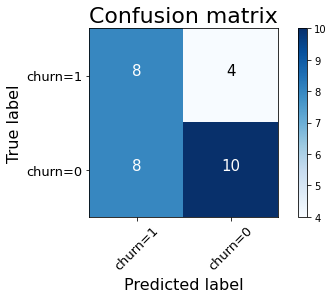

In [61]:

# 5. Confusion matrix

def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn=1','churn=0'], normalize = False,  title = 'Confusion matrix')

In [62]:
pickle.dump(lr, open('lr_model.pkl','wb'))

In [63]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='liblinear')


In [65]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0]


In [66]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred), ": is the accuracy score")
# from sklearn.metrics import precision_score
# print(precision_score(y_test, y_pred), ": is the precision score")
# from sklearn.metrics import recall_score
# print(recall_score(y_test, y_pred), ": is the recall score")
# from sklearn.metrics import f1_score
# print(f1_score(y_test, y_pred), ": is the f1 score")

In [70]:
data1= pd.read_csv('input.csv')
# data1 = data1.astype(float)
logModel_grid.predict(data1)

/home/snekha/miniconda3/envs/ml38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])